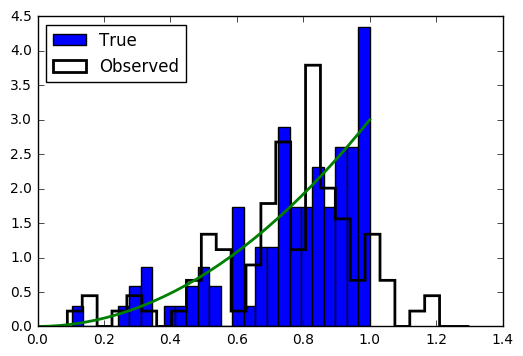

In [3]:
#-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-#
import numpy as np                                                                    # 
from matplotlib import pyplot as plt                                                  #
from scipy import stats                                                               #
from astroML.stats.random import trunc_exp                                            #
from astroML.plotting import setup_text_plots                                         #
from scipy import integrate                                                           #
#-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-#

#-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-#
#                      STEP 1 - CREATE OUR DISTRIBUTION                               #
size=100
dist_max = 1.0 # in kpc
dist = (np.random.uniform(size=size))**(1.0/3.0) * dist_max

# Plot sample
bins = np.linspace(0.0, 1.0, 30)
plt.hist(dist, bins=bins, normed=True, label='True')

# Plot analytic
plt.plot(bins, 3.0 * bins**2 * dist_max**-3, linewidth=2.0)

# Now add uncertainties of 100 pc
observed_distribution = dist + np.random.normal(size=size, scale=0.1)
# Array of errors
dist_err = 0.1 * np.ones(len(observed_distribution))


bins = np.linspace(0.0, 1.3, 30)
plt.hist(observed_distribution, bins=bins, normed=True, histtype='step', 
         linewidth=2.0, color='k', label='Observed')


plt.legend(loc=2)

plt.show()


#
#-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-#


In [8]:
#-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-#
#                     STEP 3 - CALCULATE THE LIKELIHOOD                               #
#                                                                                     #
#                         P(D|M)  *  P(M)                                             #
#              P (M|D) = ------------------                                           #
#                               P(D)                                                  #
#                                                                                     #
#    * P(M) = prior                                                                   #
#    * P(D|M) - likelihood                                                            #
#                                                                                     #
#                           WHAT IS THE LIKELIHOOD?                                   #
#                                                                                     #
#      P(D|M) = S h(x')*e(x-x')dx' = S (analytical_function)*(errors) =>              #
#                                  = S b*x^a * exp(-(x-x')^2/(2*sigma^2))dx'          #
#                                                                                     #
def integral(xprime, xobs, a, b, sigma):  
    
    norm_factor = (a+1)/(b*dist_max**(a+1))
    return b * xprime ** a * np.exp(-(xobs-xprime)**2
                                    /(2*sigma**2))/(sigma*np.sqrt(2*np.pi))
#
#                                                                                     #
#        
#
def calcLikelihood(a, b):                
                                                                                      #
    LikelihoodProduct=[]                                                              #
                                                                                      #
    for i in range (0, len(observed_distribution)):  
        
        xobs = bins[i]#
        
        sigma =  np.sqrt(xobs)
                                                                                      #
        Likelihood_point, error_point = integrate.quad(integral, min(observed_distribution)
                                                       , max(observed_distribution)
                                                       , args=(xobs, a, b, sigma))
                                                                                      #
        LikelihoodProduct.append((Likelihood_point))       #
                                                                                      #
    LikelihoodProduct=np.array(LikelihoodProduct)                                     #
                                                                                      #
    LikelihoodProduct=np.log(LikelihoodProduct)    
    
    plt.plot(LikelihoodProduct)
    
    #print LikelihoodProduct
                                                                                      #
    return np.prod(LikelihoodProduct)

#
                               #
def prior(a, b):                                                                      #
    #   For a flat distribution  #                                                    #
    if a>100. and a<-100.:                                                            #
        return -np.inf                                                                #
    else:                                                                             #
        return 1.                                                                     #
                                                                                      #
def multiply(a, b):                                            #
    return calcLikelihood(a, b)*prior(a, b) 

from scipy import optimize
from scipy.optimize import fmin,leastsq,fminbound,basinhopping

plt.show()    

print(calcLikelihood(2, 1))

#xin = 2

#xopt = optimize.basinhopping(multiply(a,b), xin,  stepsize=0.1)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in double_scalars
/usr/lib/python2.7/dist-packages/scipy/integrate/quadpack.py:357: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


IndexError: index 30 is out of bounds for axis 0 with size 30